In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


EDA

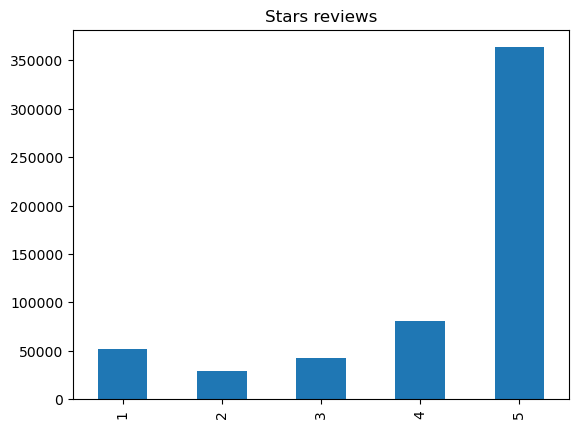

In [8]:
pt=df['Score'].value_counts().sort_index().plot(kind='bar',title="Stars reviews")



In [9]:
import nltk

In [11]:
ex=df['Text'][39]
print(ex)

I ordered this for my wife as it was reccomended by our daughter.  She has this almost every morning and likes all flavors.  She's happy, I'm happy!!!<br /><a href="http://www.amazon.com/gp/product/B001EO5QW8">McCANN'S Instant Irish Oatmeal, Variety Pack of Regular, Apples & Cinnamon, and Maple & Brown Sugar, 10-Count Boxes (Pack of 6)</a>


In [13]:
tokens=nltk.word_tokenize(ex)
tokens[:10]

['I', 'ordered', 'this', 'for', 'my', 'wife', 'as', 'it', 'was', 'reccomended']

In [17]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yores\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [19]:
posed=nltk.pos_tag(tokens)


In [21]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\yores\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


True

In [23]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\yores\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [24]:
chnk=nltk.chunk.ne_chunk(posed)

In [26]:
chnk.pprint()

(S
  I/PRP
  ordered/VBD
  this/DT
  for/IN
  my/PRP$
  wife/NN
  as/IN
  it/PRP
  was/VBD
  reccomended/VBN
  by/IN
  our/PRP$
  daughter/NN
  ./.
  She/PRP
  has/VBZ
  this/DT
  almost/RB
  every/DT
  morning/NN
  and/CC
  likes/VBZ
  all/DT
  flavors/NNS
  ./.
  She/PRP
  's/VBZ
  happy/JJ
  ,/,
  I/PRP
  'm/VBP
  happy/JJ
  !/.
  !/.
  !/.
  </JJ
  br/NN
  //NNP
  >/NNP
  </VBZ
  a/DT
  href=/NN
  ''/''
  http/NN
  :/:
  //www.amazon.com/gp/product/B001EO5QW8/NN
  ''/''
  >/NNP
  McCANN/NNP
  'S/POS
  (ORGANIZATION Instant/NNP Irish/NNP Oatmeal/NNP)
  ,/,
  (PERSON Variety/NNP Pack/NNP)
  of/IN
  (GPE Regular/NNP)
  ,/,
  (PERSON Apples/NNP)
  &/CC
  (PERSON Cinnamon/NNP)
  ,/,
  and/CC
  (PERSON Maple/NNP)
  &/CC
  (PERSON Brown/NNP Sugar/NNP)
  ,/,
  10-Count/JJ
  (GPE Boxes/NNP)
  (/(
  (ORGANIZATION Pack/NNP)
  of/IN
  6/CD
  )/)
  </NN
  /a/CD
  >/NN)


Using VADER(Valence Aware Dictionary and sEntiment Reasoner)

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [29]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yores\AppData\Roaming\nltk_data...


True

In [30]:
analyzer=SentimentIntensityAnalyzer()

In [35]:
analyzer.polarity_scores("I am very happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [36]:
analyzer.polarity_scores(ex)

{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.8114}

In [38]:
# Polarity for the dataset
fin={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    rev=row["Text"]
    id=row['Id']
    fin[id]=analyzer.polarity_scores(rev)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [42]:
vad_df=pd.DataFrame(fin).T
vad_df=vad_df.reset_index().rename(columns={'index':'Id'})
vad_df=vad_df.merge(df,how='left')

In [43]:
vad_df.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
